<a href="https://colab.research.google.com/github/carlos-alves-one/-NeuroCredit/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 08/02/2023
### FYP............: NeuroCredit

## I. Import Libraries and Packages

In [1]:
# Importing the pandas library to read the data
import pandas as pd

# Importing the numpy library to perform numerical operations
import numpy as np

# Importing the matplotlib library to plot the data
import matplotlib.pyplot as plt

# Importing module to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the StandardScaler module to scale the data
from sklearn.preprocessing import StandardScaler

# Importing the Logistic Regression module
from sklearn.linear_model import LogisticRegression

# Importing the metrics module to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing the RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

# Importing the Support Vector Classifier module
from sklearn.svm import SVC

# Importing the seaborn library to plot the data
import seaborn as sns

# Importing the Pipeline class for streamlining a sequence of transformations and estimators
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer



## II. Data Inspection and Visualisation

### a. Loading the Dataset

In [2]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')


### b. Inspecting the Data Structure

In [3]:
# Printing the first 5 rows of the data
data.head().T


,0,1,2,3,4
credit_history,Fair,Good,Fair,Good,Fair
employment_status,Unemployed,Self-Employed,Self-Employed,Unemployed,Unemployed
collateral,Other,None,House,Other,Land
payment_history,Excellent,Poor,Fair,Poor,Excellent
type_of_credit_accounts,Student,Auto,Personal,Mortgage,Personal
public_records_and_collections,Other,Tax Lien,Bankruptcy,Other,None
purpose_of_loan,Home Improvement,Debt Consolidation,Home Improvement,Car Financing,Car Financing
income,46319,15480,21614,25874,20389
assets_value,14680,46713,13026,27908,44309
debt_to_income_ratio,41,82,68,34,75


In [4]:
# Print the first 5 rows of the data with the approval status approved
data[data['approval_status'] == 'Approved'].head().T


,6,18,20,38,39
credit_history,Good,Good,Good,Good,Good
employment_status,Employed,Self-Employed,Self-Employed,Employed,Self-Employed
collateral,Land,Land,Other,Land,Car
payment_history,Good,Poor,Excellent,Excellent,Excellent
type_of_credit_accounts,Personal,Auto,Student,Other,Personal
public_records_and_collections,Other,None,None,Tax Lien,Collection
purpose_of_loan,Debt Consolidation,Car Financing,Home Improvement,Home Improvement,Car Financing
income,19229,45434,15749,41136,36676
assets_value,44998,44699,43277,46745,27209
debt_to_income_ratio,7,52,98,54,94


In [5]:
# Display concise summary of a DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   credit_history                                   1000 non-null   object
 1   employment_status                                1000 non-null   object
 2   collateral                                       1000 non-null   object
 3   payment_history                                  1000 non-null   object
 4   type_of_credit_accounts                          1000 non-null   object
 5   public_records_and_collections                   1000 non-null   object
 6   purpose_of_loan                                  1000 non-null   object
 7   income                                           1000 non-null   int64 
 8   assets_value                                     1000 non-null   int64 
 9   debt_to_income_ratio                      

### c. Convert the integer values to float values

In [6]:
# Get the list of columns with int64 data type
int_columns = data.select_dtypes(include=['int64']).columns

# Convert the int64 columns to float64 columns
data[int_columns] = data[int_columns].astype('float64')

# Display concise summary of a DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   credit_history                                   1000 non-null   object 
 1   employment_status                                1000 non-null   object 
 2   collateral                                       1000 non-null   object 
 3   payment_history                                  1000 non-null   object 
 4   type_of_credit_accounts                          1000 non-null   object 
 5   public_records_and_collections                   1000 non-null   object 
 6   purpose_of_loan                                  1000 non-null   object 
 7   income                                           1000 non-null   float64
 8   assets_value                                     1000 non-null   float64
 9   debt_to_income_ratio           

In [7]:
# Describing the dataset with the mean, standard deviation, min, max, etc.
data.describe().T


,count,mean,std,min,25%,50%,75%,max
income,1000.0,30153.197,11315.528438,10010.0,20533.50,29869.0,39686.00,49977.0
assets_value,1000.0,30298.341,11588.336078,10085.0,19925.75,30351.5,40436.00,49999.0
debt_to_income_ratio,1000.0,49.252,29.050618,0.0,24.00,49.0,73.25,100.0
length_of_credit_history,1000.0,51.805,28.601066,0.0,27.00,54.0,76.00,100.0
number_of_credit_inquiries,1000.0,2.521,1.740284,0.0,1.00,3.0,4.00,5.0
number_of_credit_accounts,1000.0,2.433,1.713607,0.0,1.00,2.0,4.00,5.0
number_of_credit_accounts_opened_last_12_months,1000.0,2.485,1.709590,0.0,1.00,2.0,4.00,5.0
current_balance_of_credit_accounts,1000.0,9877.959,5794.251531,2.0,4787.00,9744.5,14813.75,19991.0
total_credit_limit,1000.0,9999.271,5800.690467,30.0,4948.75,9748.0,15206.50,19990.0
total_credit_utilization,1000.0,51.796,29.147212,0.0,27.00,52.5,77.00,100.0


### d. Visualising the Dataset

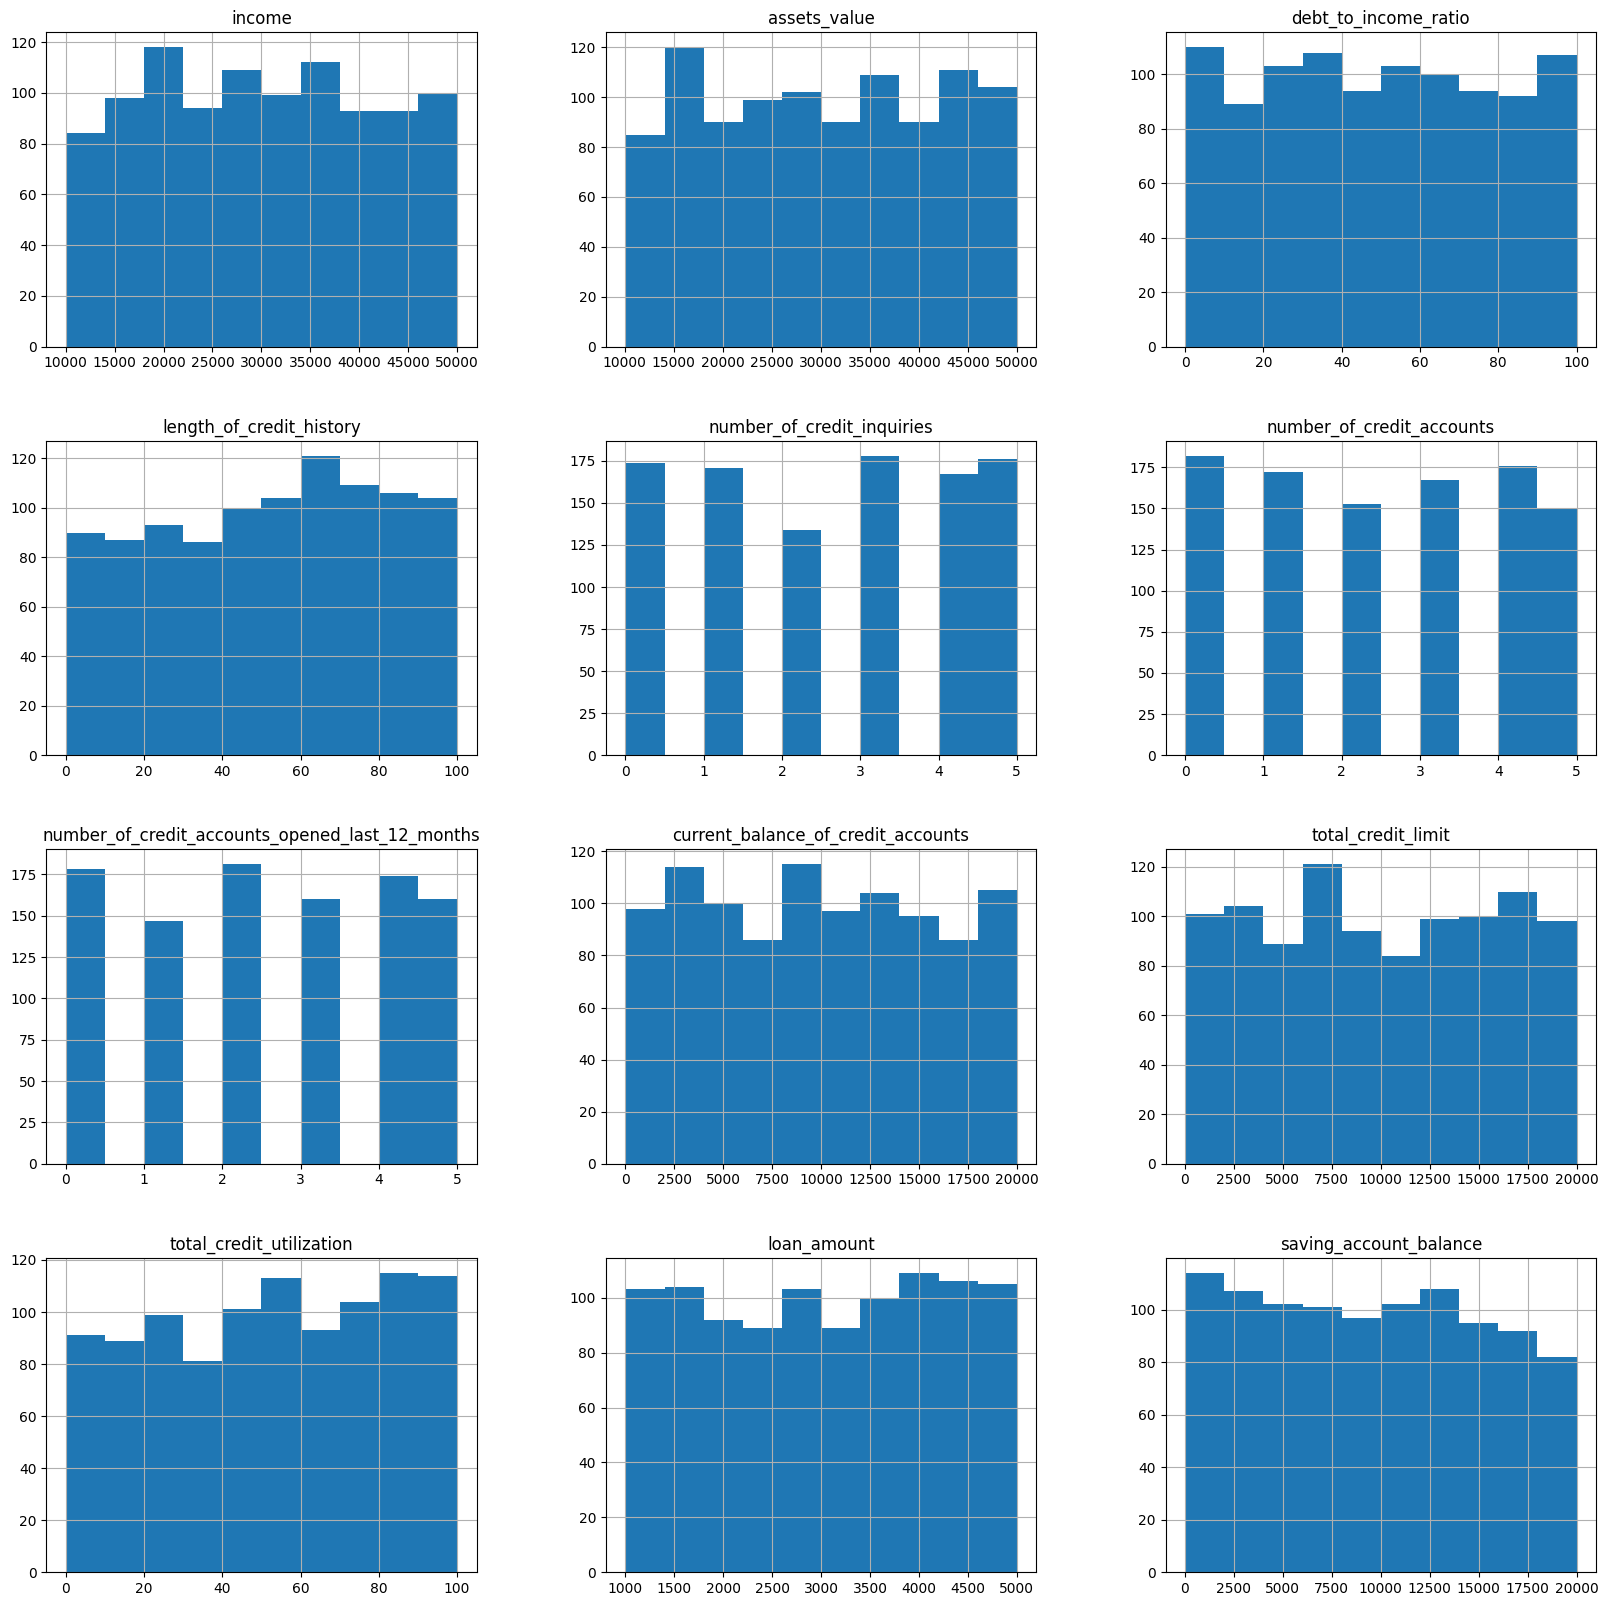

In [8]:
# Plotting the histogram of the data
data.hist(figsize=(20,20))
plt.show()


## III. Data Pre-Processing

### a. Check for Missing Values on the dataset

In [9]:
# Print the missing values in the dataset
data.isnull().sum()


credit_history                                     0
employment_status                                  0
collateral                                         0
payment_history                                    0
type_of_credit_accounts                            0
public_records_and_collections                     0
purpose_of_loan                                    0
income                                             0
assets_value                                       0
debt_to_income_ratio                               0
length_of_credit_history                           0
number_of_credit_inquiries                         0
number_of_credit_accounts                          0
number_of_credit_accounts_opened_last_12_months    0
current_balance_of_credit_accounts                 0
total_credit_limit                                 0
total_credit_utilization                           0
loan_amount                                        0
saving_account_balance                        

### b. Looking for Correlations

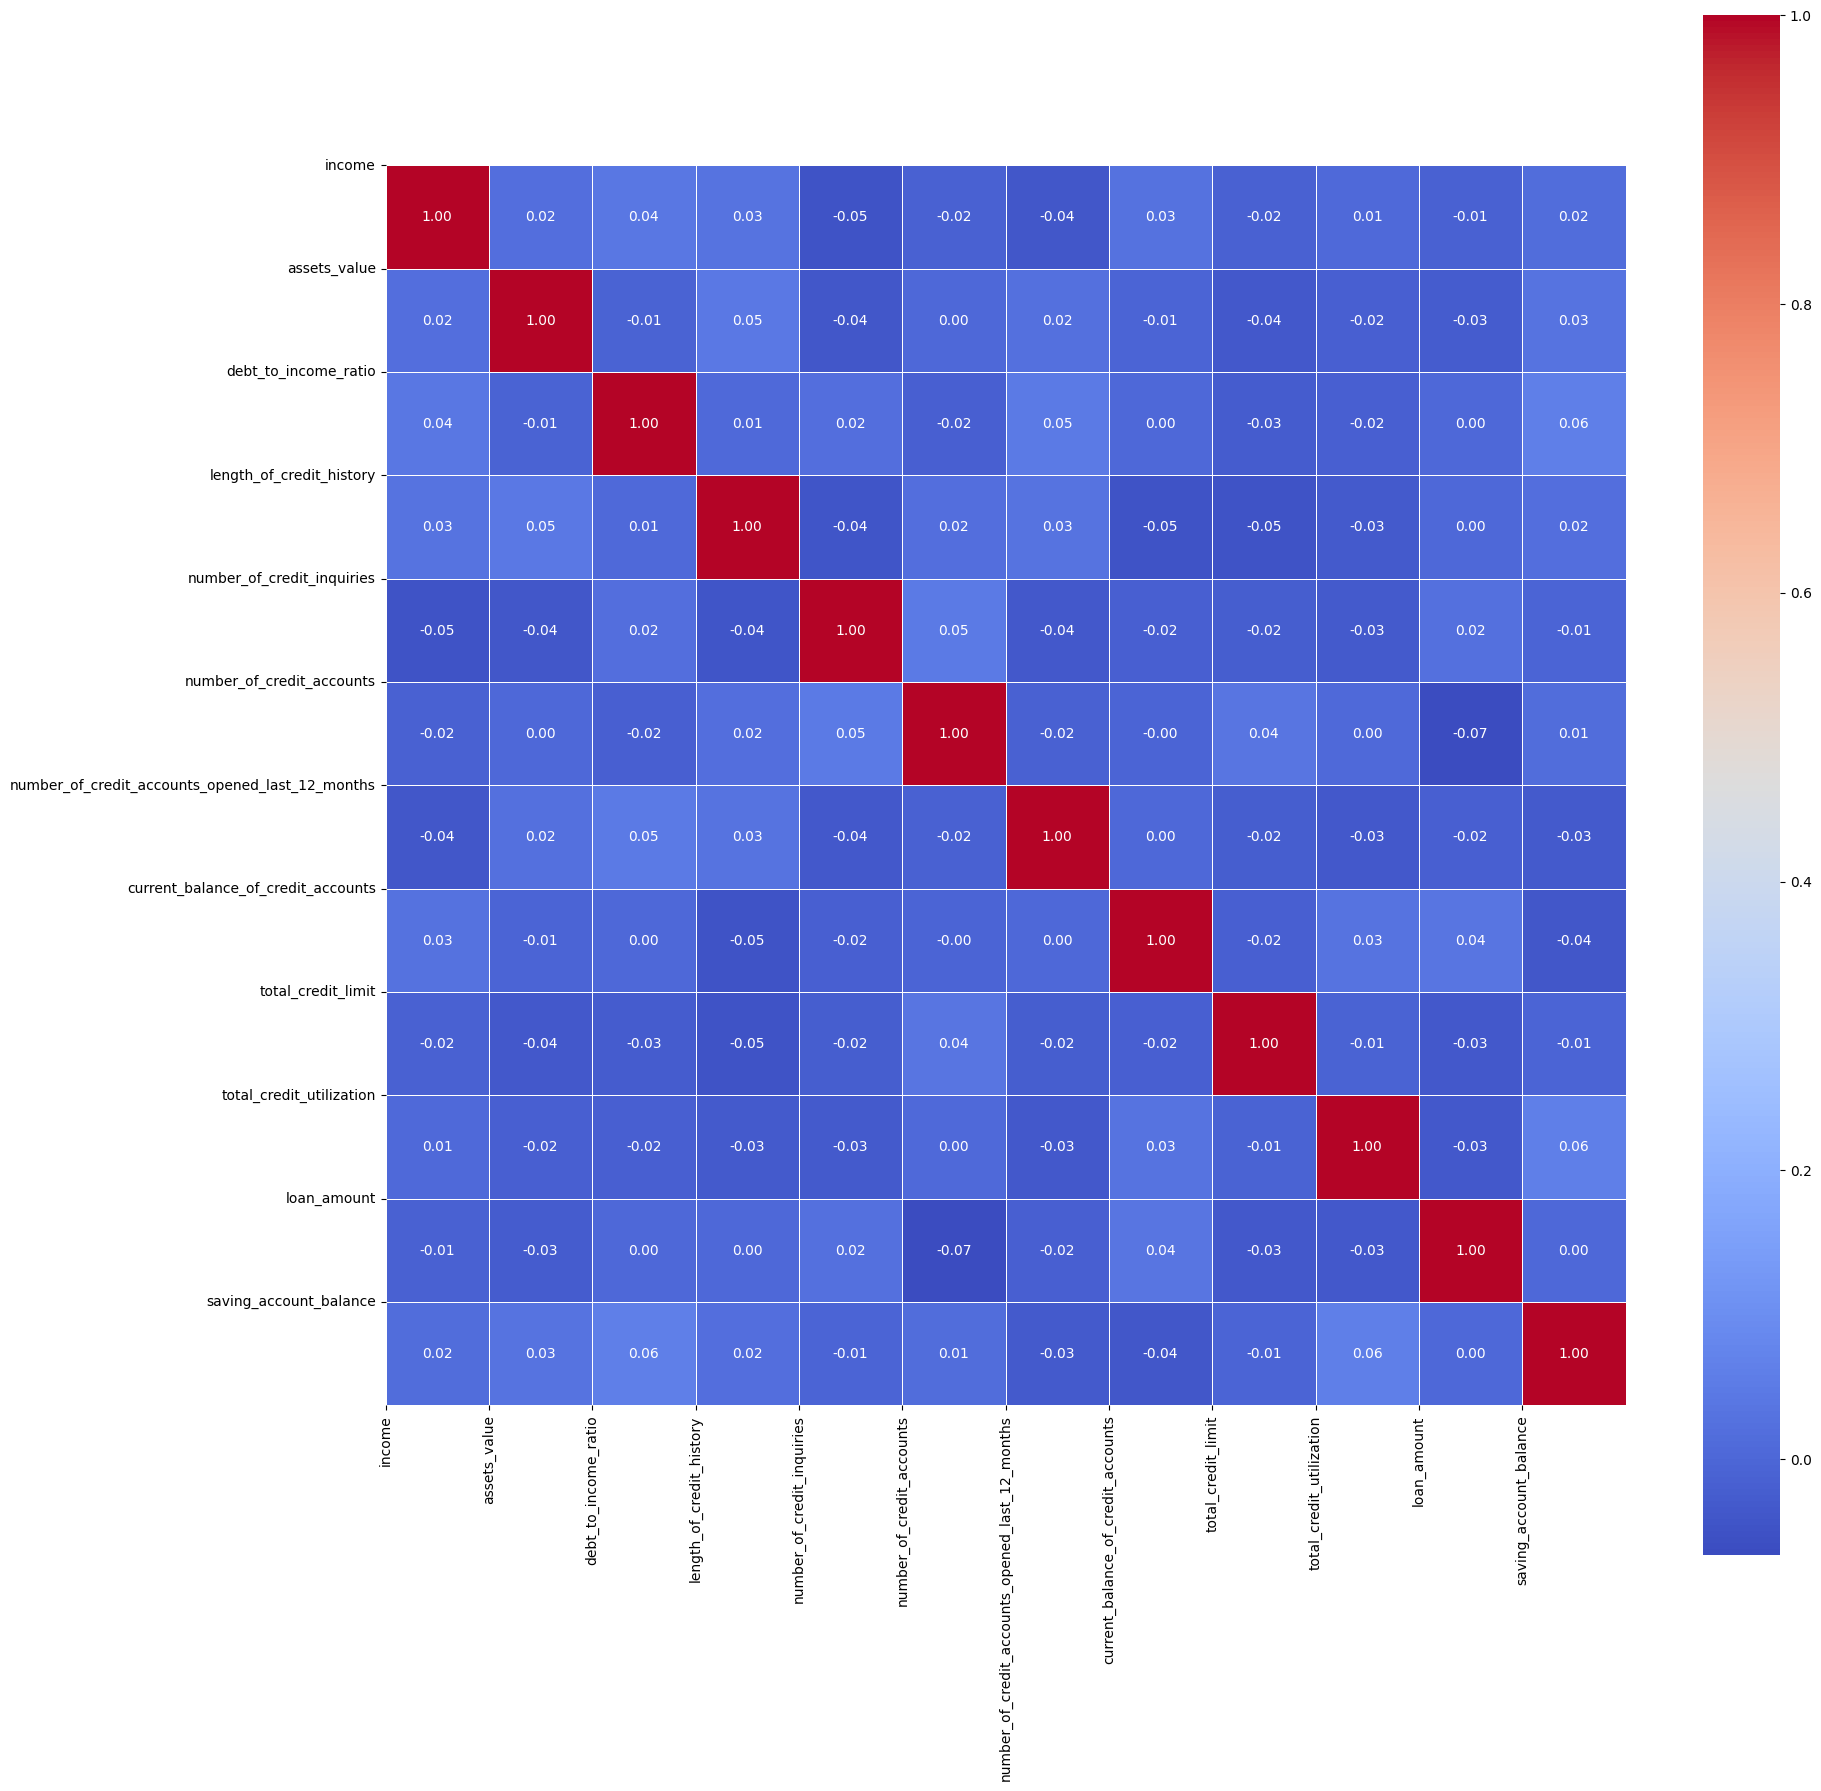

In [10]:
# Create a correlation matrix of the dataset
corr = data.corr()

# Plot the correlation matrix of the dataset
plt.figure(figsize=(20, 20))

# Using Seaborn's heatmap for a better visualization
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Set the x and y-axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Display the plot
plt.show()


In [11]:
# Create a list of features
features = [
    "income",
    "assets_value",
    "debt_to_income_ratio",
    "length_of_credit_history",
    "number_of_credit_inquiries",
    "number_of_credit_accounts",
    "number_of_credit_accounts_opened_last_12_months",
    "current_balance_of_credit_accounts",
    "total_credit_limit",
    "total_credit_utilization",
    "loan_amount",
    "saving_account_balance",
]

# Calculate the covariance matrix
cov_matrix = data[features].cov()

# Sort the covariance matrix by descending values
sorted_cov_matrix = cov_matrix.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Display the sorted covariance matrix with values greater than 0.5 
print(sorted_cov_matrix[sorted_cov_matrix > 0.5])


                                                 assets_value  \
income                                           2.592053e+06   
assets_value                                     1.342895e+08   
debt_to_income_ratio                                      NaN   
length_of_credit_history                         1.494497e+04   
number_of_credit_inquiries                                NaN   
number_of_credit_accounts                        5.624960e+01   
number_of_credit_accounts_opened_last_12_months  4.387414e+02   
current_balance_of_credit_accounts                        NaN   
total_credit_limit                                        NaN   
total_credit_utilization                                  NaN   
loan_amount                                               NaN   
saving_account_balance                           2.051614e+06   

                                                 current_balance_of_credit_accounts  \
income                                                             

### c. Income and assets value are highly correlated

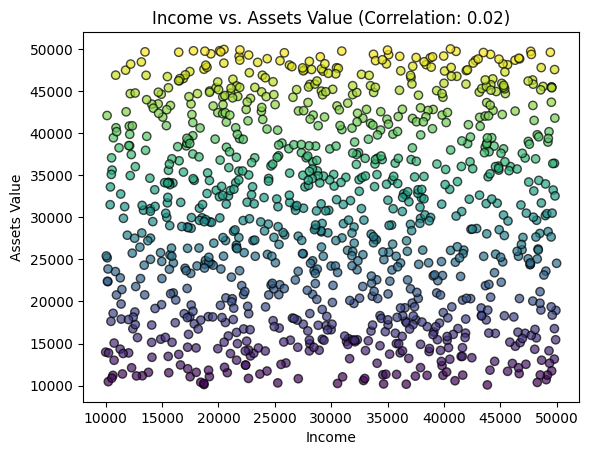

In [12]:
# Extract the correlation value between 'income' and 'debt_to_income_ratio'
correlation_value = corr.loc['income', 'assets_value']

# Create the scatter plot
plt.scatter(data['income'], data['assets_value'], c=data['assets_value'], cmap='viridis', alpha=0.7, edgecolors='k')

# Set the title, x-axis label, and y-axis label
plt.title(f"Income vs. Assets Value (Correlation: {correlation_value:.2f})")
plt.xlabel('Income')
plt.ylabel('Assets Value')

# Display the plot
plt.show()


### d. Prepare the dataset

In [13]:
# Create a new dataframe with the columns that are highly correlated with the income

data_new = data[['income',
                'assets_value',
                'debt_to_income_ratio',
                'length_of_credit_history',
                'number_of_credit_accounts',
                'number_of_credit_accounts_opened_last_12_months',
                'saving_account_balance',
                'approval_status']]
# Print the first 5 rows of the new dataframe
data_new.head().T


,0,1,2,3,4
income,46319.0,15480.0,21614.0,25874.0,20389.0
assets_value,14680.0,46713.0,13026.0,27908.0,44309.0
debt_to_income_ratio,41.0,82.0,68.0,34.0,75.0
length_of_credit_history,24.0,0.0,99.0,55.0,30.0
number_of_credit_accounts,3.0,3.0,4.0,4.0,0.0
number_of_credit_accounts_opened_last_12_months,4.0,2.0,2.0,2.0,5.0
saving_account_balance,10207.0,16666.0,10413.0,16645.0,16366.0
approval_status,Rejected,Rejected,Rejected,Rejected,Rejected


In [14]:
# Print the first 5 rows of the new dataframe with the approval status approved
data_new[data_new['approval_status'] == 'Approved'].head().T


,6,18,20,38,39
income,19229.0,45434.0,15749.0,41136.0,36676.0
assets_value,44998.0,44699.0,43277.0,46745.0,27209.0
debt_to_income_ratio,7.0,52.0,98.0,54.0,94.0
length_of_credit_history,6.0,1.0,72.0,64.0,74.0
number_of_credit_accounts,2.0,3.0,0.0,4.0,2.0
number_of_credit_accounts_opened_last_12_months,5.0,2.0,5.0,2.0,5.0
saving_account_balance,19511.0,5122.0,9601.0,18191.0,17357.0
approval_status,Approved,Approved,Approved,Approved,Approved


### e. Select features and target

In [15]:
# Store the features in the X variable and the target in the y variable
X = data_new.drop('approval_status', axis=1)
y = data_new['approval_status']


### f. Standardize the features

In [16]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)


### g. Split the dataset into train and test sets

In [17]:
# Create the X_train, X_test, y_train, y_test variables by splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## IV. Models Training and Optimisation

### a. Logistic Regression Classifier

In [18]:
# Create an instance of the Logistic Regression
# >> Initial Parameters:
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target on the test data
y_pred_log = log_reg.predict(X_test)


In [19]:
# Identify numerical and categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numeric and categorical columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Combine both pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply the preprocessing pipeline to the data
data_preprocessed = preprocessor.fit_transform(data)


In [20]:
# Convert the preprocessed data back to a DataFrame
column_names = numeric_columns.tolist() + preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns).tolist()
data_preprocessed = pd.DataFrame(data_preprocessed, columns=column_names)


In [21]:
data_preprocessed.head().T


,0,1,2,3,4
income,1.429354,-1.297380,-0.755022,-0.378360,-0.863334
assets_value,-1.348438,1.417190,-1.491239,-0.206375,1.209636
debt_to_income_ratio,-0.284198,1.127838,0.645679,-0.525277,0.886759
length_of_credit_history,-0.972653,-1.812202,1.650939,0.111765,-0.762766
number_of_credit_inquiries,1.425193,1.425193,-0.874433,0.850287,0.850287
number_of_credit_accounts,0.331047,0.331047,0.914903,0.914903,-1.420523
number_of_credit_accounts_opened_last_12_months,0.886621,-0.283836,-0.283836,-0.283836,1.471849
current_balance_of_credit_accounts,-0.049550,-0.198737,0.711240,1.002536,-1.498952
total_credit_limit,1.375995,-1.310891,0.113100,1.582798,-0.957308
total_credit_utilization,0.315934,0.281609,1.311382,0.075654,1.654639


### b. Random Forest Classifier

In [22]:
# Create a random forest classifier
# >> Initial Parameters:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Predict the target on the test data
y_pred_rf = rf_clf.predict(X_test)


### c. Support Vector Machine (SVM) Classifier

In [23]:
# Create an instance of the Support Vector Classifier
# >> Initial Parameters:
svc_clf = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the training data
svc_clf.fit(X_train, y_train)

# Predict the target on the test data
y_pred_svc = svc_clf.predict(X_test)


## V. Make Predictions and Evaluate the Model

### a. Logistic Regression

In [24]:
# Predict the target on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### b. Random Forest Classifier

In [25]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### c. Support Vector Machine (SVM) Classifier

In [26]:
# Make predictions on the test data
y_pred_svc = svc_clf.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### d. Evaluate all Models

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

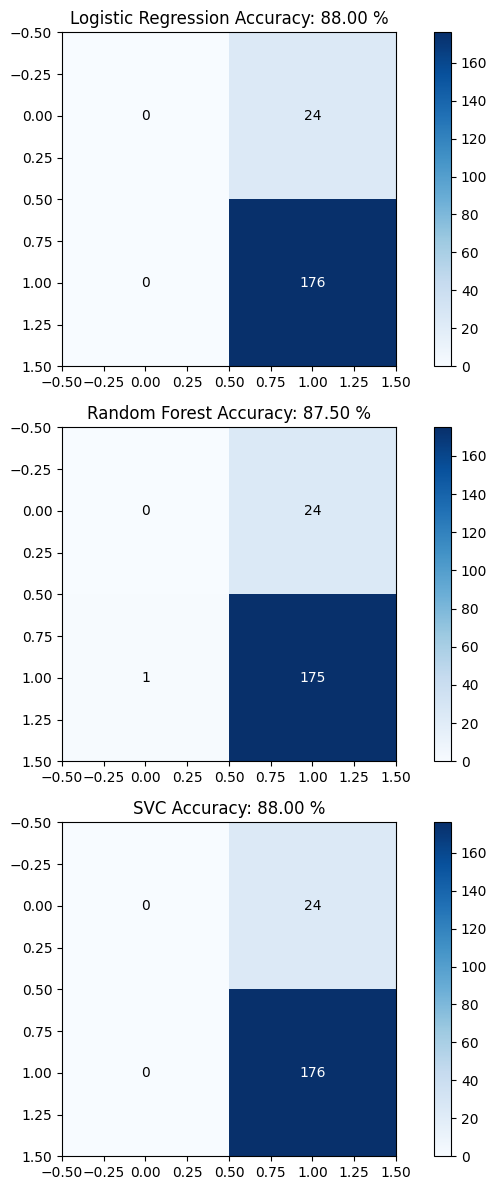

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00        24
    Rejected       0.88      1.00      0.94       176

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200


Random Forest Classification Report:
              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00        24
    Rejected       0.88      0.99      0.93       176

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200


SVC Classification Report:
              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00        24
    Rejected       0.88      1.00      0.94       176

    accuracy                           0.88       200
   macro avg       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [27]:
# Store the predictions of the models in a dictionary
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf, 'SVC': y_pred_svc}

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(8, len(models) * 4))

# For each model, calculate the accuracy, confusion matrix, and classification report
for ax, (name, y_pred) in zip(axes, models.items()):

    # Calculate the accuracy of the model: accuracy, confusion matrix, classification report
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Set the title of the axes to the model name and the accuracy
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(f"{name} Accuracy: {accuracy * 100:.2f} %")

    # Plot the confusion matrix
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, format(conf_matrix[i, j], "d"),
                    ha="center", va="center",
                    color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Adjust the subplot layout and show the plot
plt.tight_layout()
plt.show()

# For each model, calculate classification report
for name, y_pred in models.items():

    # Calculate the classification report
    class_report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f"{name} Classification Report:\n{class_report}\n")
